In [2]:
import pandas as pd
import numpy as np


# Preprocessing / Data Loading

    Load the Diabetes dataset into a pandas DataFrame:
        You can download the dataset from the UCI Machine Learning Repository website.
        Load the dataset into a pandas DataFrame using pandas.read_csv() function.

    Handle any missing values in the dataset:
        Check for any missing values in the DataFrame using pandas.isna() function.
        If there are any missing values, you can handle them by either removing the rows or imputing the missing values with the mean or median of the feature.

    Remove any outliers from the dataset:
        Check for any outliers in the DataFrame using statistical methods such as z-score or Interquartile Range (IQR).
        If there are any outliers, you can handle them by either removing the rows or imputing them with a value that is within the acceptable range.

    Normalize (Regularize) the data:
        Normalize the data using either min-max normalization or z-score normalization.

    Split the dataset into a training set and a test set:
        Split the preprocessed DataFrame into a training set and a test set using numpy.random.rand() or sklearn.model_selection.train_test_split() functions.


      age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  target
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   151.0
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0    75.0
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   141.0
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   206.0
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0   135.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...     ...
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   178.0
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   104.0
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   132.0
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   220.0
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0    57.0

[442 rows x 11 columns]
age       0
sex       0
bmi       0
bp 

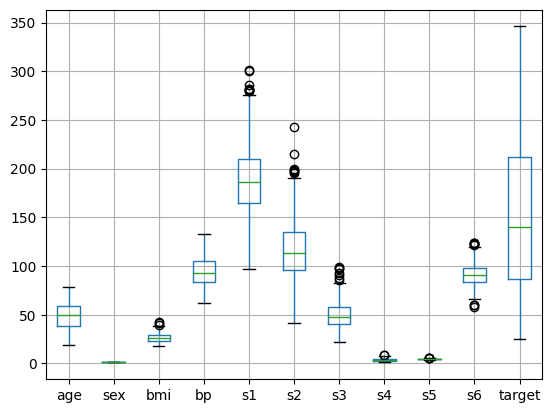

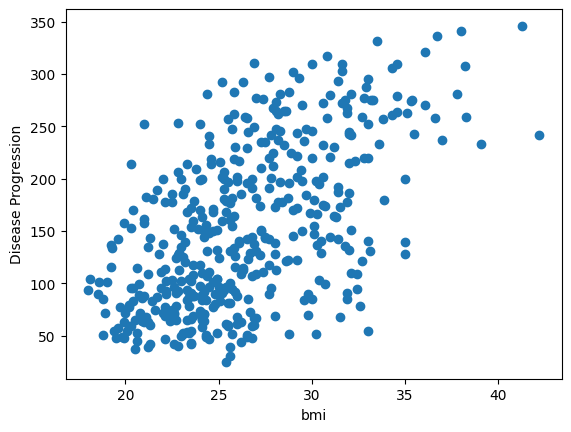

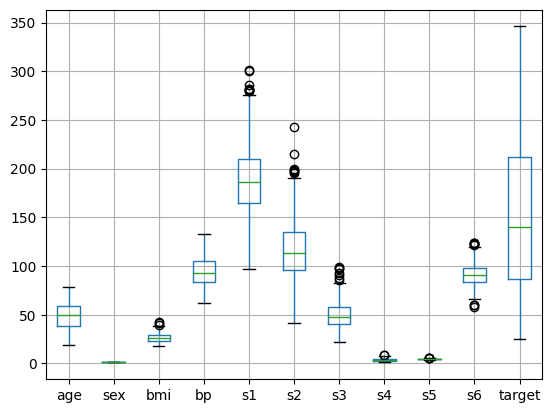

In [3]:
df = pd.read_csv("diabetes.csv")
print(df)
print(df.isna().sum())
df.fillna(df.median(), inplace=True)
print(df)

import matplotlib.pyplot as plt
# Visualize the distribution of each feature using boxplots
df.boxplot()
plt.show()

# Visualize the relationship between two features using scatterplots
plt.scatter(df['bmi'], df['target'])
plt.xlabel('bmi')
plt.ylabel('Disease Progression')
plt.show()

# Identify and remove outliers
df = df[(df['bmi'] < 50) & (df['target'] < 350)]
df.boxplot()
plt.show()



In [4]:

df = pd.read_csv("diabetes.csv")

#df.isnull().values.any()
#df.isna().values.any()

df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [5]:
df["bmi"].unique()
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

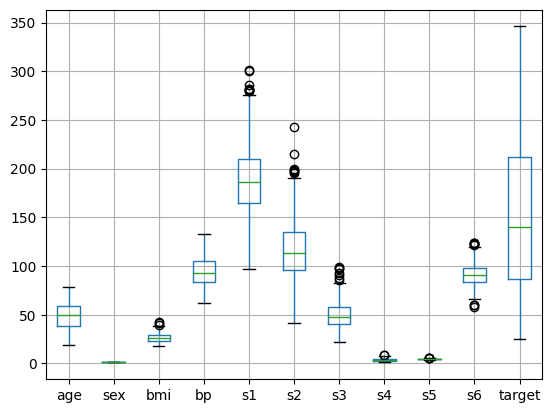

In [6]:
df.boxplot()
plt.show()

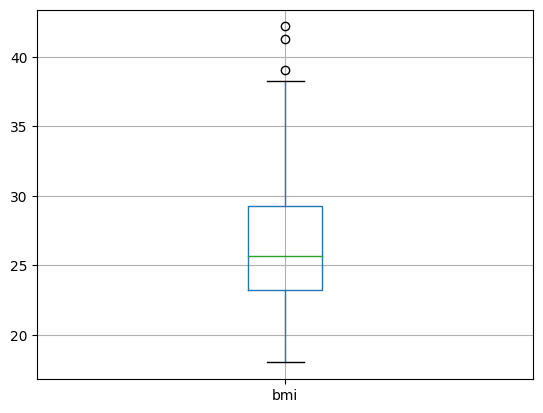

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.close() # to clear previous plots
df = pd.read_csv("diabetes.csv")
df.boxplot(column="bmi")
plt.show()

In [8]:
# Finding the outliers in the bmi column. They are visualized above.

q1 = df['bmi'].quantile(q=0.25)
q3 = df['bmi'].quantile(q=0.75)
med = df['bmi'].median()

iqr = q3 - q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

outliers = df['bmi'][(df['bmi'] <= lower_bound) | (df['bmi'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))


6.074999999999999 38.387499999999996 14.0875
The following are the outliers in the boxplot:256    41.3
366    39.1
367    42.2
Name: bmi, dtype: float64


In [9]:
# Now remove the outliers from the dataset:
df2 = df.copy()
df2['bmi'] = df['bmi'][(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

df2.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,439.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.276765,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.265419,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.150000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.200000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,38.300000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [10]:
# Now we must implement that for all columns:
import numpy as np

df_cleaned = df.copy()
for column in df:
    print(column)
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    med = df[column].median()

    iqr = q3 - q1

    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    #print(iqr, upper_bound, lower_bound)

    outliers = df[column][(df[column] <= lower_bound) | (df[column] >= upper_bound)]
    #print('The following are the outliers in the boxplot:{}'.format(outliers))

    #remove
    #df_cleaned[column] = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    #replace outliers with NaN (not a number object)
    # df_cleaned[column][(df[column] <= lower_bound) | (df[column] >= upper_bound)] = np.nan
    # print("replaced in ", column, df_cleaned[column][(df[column] <= lower_bound) | (df[column] >= upper_bound)], "with: ", np.nan)

    #replace outliers with median
    df_cleaned[column][(df[column] <= lower_bound) | (df[column] >= upper_bound)] = df_cleaned[column].median()
    print("replaced in ", column, df_cleaned[column][(df[column] <= lower_bound) | (df[column] >= upper_bound)], "with: ", df_cleaned[column].median())

age
replaced in  age Series([], Name: age, dtype: float64) with:  50.0
sex
replaced in  sex Series([], Name: sex, dtype: float64) with:  1.0
bmi
replaced in  bmi 256    25.7
366    25.7
367    25.7
Name: bmi, dtype: float64 with:  25.7
bp
replaced in  bp Series([], Name: bp, dtype: float64) with:  93.0
s1
replaced in  s1 123    186.0
161    186.0
202    186.0
230    186.0
248    186.0
276    186.0
287    186.0
346    186.0
Name: s1, dtype: float64 with:  186.0
s2
replaced in  s2 123    113.0
161    113.0
230    113.0
248    113.0
287    113.0
346    113.0
376    113.0
Name: s2, dtype: float64 with:  113.0
s3
replaced in  s3 35     48.0
58     48.0
260    48.0
261    48.0
269    48.0
286    48.0
441    48.0
Name: s3, dtype: float64 with:  48.0
s4
replaced in  s4 123    4.0
216    4.0
322    4.0
336    4.0
Name: s4, dtype: float64 with:  4.0
s5
replaced in  s5 23     4.62005
169    4.62005
322    4.62005
353    4.62005
Name: s5, dtype: float64 with:  4.617575
s6
replaced in  s6 23     91

In [11]:
df_cleaned.describe()
# we have a cleaned dataset. Now we must regularize it?

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.272851,94.647014,187.321267,113.959955,49.073529,4.030950,4.627990,91.036199,152.133484
std,13.109028,0.499561,4.251150,13.831283,31.959100,28.062337,11.689566,1.223273,0.503325,10.543875,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,66.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,84.000000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.617575,91.000000,140.500000
75%,59.000000,2.000000,29.200000,105.000000,207.000000,132.150000,56.750000,5.000000,4.983600,98.000000,211.500000
max,79.000000,2.000000,38.300000,133.000000,276.000000,190.200000,83.000000,7.900000,6.068400,120.000000,346.000000


In [12]:
df_normalized = df_cleaned.copy()
for column in df_cleaned:

    mean = df_cleaned[column].mean()
    std = df_cleaned[column].std()

    df_normalized[column] = (df_cleaned[column] - mean) / std

In [13]:
df_normalized.describe()
# must check if that is plausible?

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,0.000000,2.893613e-16,6.530724e-16,1.044916e-15,-2.973991e-16,-4.943255e-16,2.411344e-16,-9.645377e-17,2.491722e-16,0.000000,-1.567374e-16
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-2.251738,-9.374744e-01,-1.946026e+00,-2.360375e+00,-2.826152e+00,-2.578543e+00,-2.316042e+00,-1.660259e+00,-2.721679e+00,-2.374478,-1.649092e+00
25%,-0.783285,-9.374744e-01,-7.228281e-01,-7.697777e-01,-7.218998e-01,-6.382204e-01,-7.548210e-01,-8.427799e-01,-6.979377e-01,-0.667326,-8.448689e-01
50%,0.113044,-9.374744e-01,-1.347519e-01,-1.190789e-01,-4.134243e-02,-3.420794e-02,-9.183655e-02,-2.530115e-02,-2.069158e-02,-0.003433,-1.509019e-01
75%,0.799594,1.064282e+00,6.885547e-01,7.485196e-01,6.157474e-01,6.482014e-01,6.566943e-01,7.921776e-01,7.065222e-01,0.660459,7.700636e-01
max,2.325260,1.064282e+00,2.829152e+00,2.772916e+00,2.774757e+00,2.716810e+00,2.902287e+00,3.162866e+00,2.861789e+00,2.746979,2.514710e+00


In [14]:
# split the dataset into training and test set
# Shuffle the rows of the dataset randomly
df_randomized = df_normalized.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into training and test sets
train_size = int(0.8 * len(df))
train_set = df_randomized[:train_size]
test_set = df_randomized[train_size:]


In [15]:
#check sets
train_set.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,0.021202,0.020874,0.012717,-0.021044,-0.016966,-0.004771,-0.052820,0.039565,0.015392,-0.001015,0.037991
std,1.014536,1.001394,1.019948,0.993263,1.009525,1.018600,1.003012,1.014504,1.013207,1.007685,1.004385
min,-2.251738,-0.937474,-1.946026,-2.360375,-2.826152,-2.578543,-2.316042,-1.660259,-2.721679,-2.184795,-1.649092
25%,-0.726072,-0.937474,-0.746351,-0.769778,-0.729722,-0.675637,-0.861754,-0.842780,-0.697938,-0.762168,-0.818926
50%,0.189328,-0.937474,-0.134752,-0.119079,-0.041342,-0.034208,-0.177383,-0.025301,-0.005940,-0.003433,-0.131445
75%,0.875877,1.064282,0.759124,0.700079,0.615747,0.642856,0.592534,0.792178,0.733543,0.660459,0.828435
max,2.325260,1.064282,2.829152,2.772916,2.774757,2.716810,2.902287,3.162866,2.861789,2.746979,2.514710


In [16]:
test_set.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,-0.084092,-0.082792,-0.050439,0.083466,0.067294,0.018924,0.209498,-0.156924,-0.061051,0.004026,-0.150683
std,0.940892,0.995754,0.920306,1.027743,0.963881,0.927754,0.965221,0.929145,0.948835,0.974489,0.973372
min,-2.251738,-0.937474,-1.663750,-1.709676,-2.137772,-2.101035,-1.631671,-1.660259,-2.248029,-2.374478,-1.467494
25%,-0.954922,-0.937474,-0.675782,-0.769778,-0.667142,-0.547351,-0.434022,-0.842780,-0.753965,-0.477642,-1.000525
50%,0.036761,-0.937474,-0.134752,0.025521,-0.010052,-0.055589,0.079256,-0.025301,-0.085411,-0.003433,-0.338986
75%,0.494461,1.064282,0.594463,0.893119,0.772197,0.649983,0.934720,0.146369,0.580163,0.470776,0.504151
max,1.714994,1.064282,2.170507,2.628316,1.961217,2.139524,2.816740,2.427135,2.344628,1.988245,2.060712


In [17]:
# Done preprocessing

In [18]:
X = df.drop('target', axis=1)
y = df['target']

print(X)
print(y)

      age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0

[442 rows x 10 columns]
0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441  

In [19]:
# split and prepare
# Shuffle the rows of the dataset randomly
test_size = 0.2
df_randomized = df_normalized.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract the features and target variable
X = df_randomized.drop('target', axis=1)
y = df_randomized['target']

# Split the dataset into training and testing sets
split_ratio = 1 - test_size
split_index = int(split_ratio * len(df_randomized))

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

In [20]:
# implement linear regression

# Implement the formula for the least-squares regression line
X_train_T = np.transpose(X_train)
beta = np.linalg.inv(X_train_T.dot(X_train)).dot(X_train_T).dot(y_train) # these are the weights

# Train the model on the training set using the least-squares regression line
y_pred_train = X_train.dot(beta) # the prediction on the train set

# Evaluate the performance of the model on the testing set using metrics such as mean squared error and R-squared
y_pred_test = X_test.dot(beta) # the prediction on the test set

# calculate the mean squared error
mse = np.mean((y_test - y_pred_test)**2)
r_squared = 1 - (np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))

print('Mean squared error:', mse)
print('R-squared:', r_squared)

# that should do

Mean squared error: 0.5359087499312691
R-squared: 0.42794122908248045


In [21]:
# # implement least squares regression
# weights = np.linalg.inv(np.transpose(X_train) @ X_train) @ np.transpose(X_train) @ y_train

# # predict on the test set
# y_pred = X_test @ weights

# # calculate the mean squared error
# mse = np.mean((y_pred - y_test) ** 2)

# print("Mean squared error:", mse)

In [22]:
# now ridge regression:

import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("diabetes.csv")

# Extract the predictors and target variable
X = data.drop("target", axis=1)
y = data["target"]

# Standardize the predictors
X = (X - X.mean()) / X.std()

# Add a bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Define the regularization parameter
alpha = 0.1

# Compute the weight vector using ridge regression
X_T_X = X.T.dot(X)
I = np.eye(X_T_X.shape[0])
w = np.linalg.inv(X_T_X + alpha * I).dot(X.T).dot(y)

# Make predictions on test data
X_test = np.array([[54, 0, 31.9, 130, 231, 249, 70, 2.2, 40]])
X_test = (X_test - X.mean()) / X.std()
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred = X_test.dot(w)

print("Predicted target value:", y_pred[0])

ValueError: shapes (1,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

In [ ]:
def ridge_regression(X_train, y_train, alpha=0.1):
    """
    Fits a ridge regression model on the training data using the specified regularization parameter alpha.
    """
    # Add a column of ones to the training data
    #X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    
    # Compute the ridge coefficients using the closed-form solution
    n_features = X_train.shape[1]
    I = np.eye(n_features)
    w = np.linalg.inv(X_train.T.dot(X_train) + alpha * I).dot(X_train.T).dot(y_train)
    
    return w

w = ridge_regression(X, y)
X_test = (X_test - X.mean()) / X.std()
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred = X_test.dot(w)

print("Predicted target value:", y_pred[0])



Predicted target value: 2211.8044023691023
Mean squared error: 4892746.2379336115
R-squared: -5222788.140208266


In [ ]:
# Now Lasso regression:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Next, let's define a function to perform Lasso regression using coordinate descent:
def lasso_regression(X, y, alpha, max_iter=1000, tol=1e-4):
    # Normalize X and y
    X = (X - X.mean()) / X.std()
    y = (y - y.mean()) / y.std()

    # Initialize weights
    w = np.zeros(X.shape[1])

    # Define the soft-thresholding function
    soft_threshold = lambda x, gamma: np.sign(x) * np.maximum(np.abs(x) - gamma, 0)

    # Perform coordinate descent
    for i in range(max_iter):
        w_old = w.copy()

        # Update each weight in turn
        for j in range(X.shape[1]):
            X_j = X[:, j]
            y_pred = X.dot(w) - X_j * w[j]
            rho = X_j.dot(y - y_pred)

            # Update the weight using the soft-thresholding function
            w[j] = soft_threshold(rho, alpha) / (X_j ** 2).sum()

        # Check for convergence
        if np.linalg.norm(w - w_old) < tol:
            break

    return w




Here, the function takes in the input matrix X, target vector y, regularization parameter alpha, maximum number of iterations max_iter (default is 1000), and tolerance tol (default is 1e-4). It first normalizes X and y to have zero mean and unit variance. It then initializes the weight vector w to all zeros, defines the soft-thresholding function for the L1 penalty, and performs coordinate descent to update each weight in turn. The algorithm stops when the L2 norm of the weight update falls below the tolerance tol, or when the maximum number of iterations is reached.

We can now split the dataset into training and testing sets, and use the function to train a Lasso regression model:

In [ ]:
# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Extract the input matrix X and target vector y
X_train = train_data.drop("target", axis=1).values
y_train = train_data["target"].values
X_test = test_data.drop("target", axis=1).values
y_test = test_data["target"].values

# Train the model using Lasso regression with alpha=0.1
w = lasso_regression(X_train, y_train, alpha=0.1)


Finally, we can evaluate the performance of the model on the testing set using the mean squared error and R-squared metrics:

In [ ]:
# Make predictions on the testing set
y_pred = X_test.dot(w)

# Compute the mean squared error and R-squared
mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

print("Mean squared error:", mse)
print("R-squared:", r2)


Mean squared error: 5546.306946929413
R-squared: 0.007386673176885461


In [ ]:
# Or like this:

import pandas as pd
import numpy as np

# Load the diabetes dataset
diabetes = pd.read_csv('diabetes.csv')

# Split the data into features and target
X = diabetes.drop(columns=['target'])
y = diabetes['target']

# Normalize the features
X = (X - X.mean()) / X.std()

# Add bias term to the feature matrix
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Define hyperparameters
alpha = 0.1  # regularization strength
n_iterations = 1000  # number of gradient descent iterations

# Initialize weights
w = np.zeros(X.shape[1])

# Define the Lasso cost function
def lasso_cost(X, y, w, alpha):
    y_pred = X.dot(w)
    mse = np.mean((y_pred - y) ** 2)
    l1_norm = np.sum(np.abs(w[1:]))
    cost = mse + alpha * l1_norm
    return cost

# Define the gradient of the Lasso cost function
def lasso_gradient(X, y, w, alpha):
    y_pred = X.dot(w)
    error = y_pred - y
    grad_mse = 2 * X.T.dot(error) / X.shape[0]
    grad_l1_norm = alpha * np.sign(w[1:])
    grad_l1_norm = np.insert(grad_l1_norm, 0, 0)
    grad = grad_mse + grad_l1_norm
    return grad

# Perform gradient descent
for i in range(n_iterations):
    gradient = lasso_gradient(X, y, w, alpha)
    w -= gradient * 0.01

# Make predictions on the test set
X_test = X[:10] # use first 10 examples for testing
y_test = y[:10]
X_test = (X_test - X.mean()) / X.std()
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_pred = X_test.dot(w)

# Evaluate performance
mse = np.mean((y_pred - y_test) ** 2)
r2 = 1 - mse / np.var(y_test)
print("Mean Squared Error:", mse)
print("R^2 score:", r2)


ValueError: shapes (10,12) and (11,) not aligned: 12 (dim 1) != 11 (dim 0)

# Findings:
Do not normalize the Target column! Does not make sense?

Should i normalize the target column?
ChatGPT

You do not need to normalize the target column in Lasso regression because the objective function in Lasso regression does not depend on the scale of the target variable. However, normalizing the input features is recommended to ensure that they are on a similar scale and to prevent features with larger magnitudes from dominating the objective function.
User
For Ridge regression, should i normalize the target column?
ChatGPT

In Ridge regression, it is not necessary to normalize the target column since the regularization term penalizes the weights of the model, which can help prevent overfitting. However, it is still recommended to normalize the input features for better performance and faster convergence.
User
For least squares regression, should i normalize the target column?
ChatGPT

Normalizing the target column is not necessary for least squares regression as it only involves minimizing the sum of squared residuals between the predicted and actual values. However, it is always a good practice to normalize the input features to ensure that they are on the same scale and to prevent any issues that may arise due to differences in their magnitudes.

--> so it's better to split the dataset beforehand and normalize it afterwards (only X).

In [29]:
# Save normalized dataset as diabetes_norm.csv
df_normalized.to_csv('diabetes_norm.csv')

In [32]:
# Lasso Regression new try

import numpy as np
import pandas as pd

diabetes_norm = pd.read_csv("diabetes_norm.csv")

diabetes_norm.insert(0, "Intercept", 1)

X_train = diabetes_norm.iloc[:train_size, :-1].values
y_train = diabetes_norm.iloc[:train_size, -1].values
X_test = diabetes_norm.iloc[train_size:, :-1].values
y_test = diabetes_norm.iloc[train_size:, -1].values

lambda_lasso = 0.1  # regularization parameter
max_iterations = 1000
tolerance = 1e-4
theta_lasso = np.zeros(X_train.shape[1])
for i in range(max_iterations):
    theta_prev = theta_lasso.copy()
    for j in range(X_train.shape[1]):
        if j == 0:
            theta_lasso[j] = np.mean(y_train)
        else:
            xj = X_train[:, j]
            rj = y_train - X_train @ theta_lasso + xj * theta_lasso[j]
            zj = xj @ xj
            if zj == 0:
                theta_lasso[j] = 0
            else:
                if np.sum(xj * rj) > lambda_lasso / 2:
                    theta_lasso[j] = (np.sum(xj * rj) - lambda_lasso / 2) / zj
                elif np.sum(xj * rj) < - lambda_lasso / 2:
                    theta_lasso[j] = (np.sum(xj * rj) + lambda_lasso / 2) / zj
                else:
                    theta_lasso[j] = 0
    if np.sum((theta_lasso - theta_prev) ** 2) < tolerance:
        break

sst = np.sum((y_test - np.mean(y_test)) ** 2)

y_pred_lasso = X_test @ theta_lasso
mse_lasso = np.mean((y_test - y_pred_lasso) ** 2)
ssr_lasso = np.sum((y_pred_lasso - np.mean(y_test)) ** 2)
r_squared_lasso = 1 - (ssr_lasso / sst)

rmse_lasso = np.sqrt(mse_lasso)



# print("Ridge regression:")
# print("Mean squared error (MSE):", mse_ridge)
# print("R-squared:", r_squared_ridge)

print("Lasso regression:")
print("Mean squared error (MSE):", mse_lasso)
print("R-squared:", r_squared_lasso)

Lasso regression:
Mean squared error (MSE): 0.5081254901924313
R-squared: 0.5378343531699665


In [34]:
# Ridge Regression new
lambda_ridge = 0.1  # regularization parameter
theta_ridge = np.linalg.inv(X_train.T @ X_train + lambda_ridge * np.identity(X_train.shape[1])) @ X_train.T @ y_train
y_pred_ridge = X_test @ theta_ridge
mse_ridge = np.mean((y_test - y_pred_ridge) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
ssr_ridge = np.sum((y_pred_ridge - np.mean(y_test)) ** 2)
r_squared_ridge = 1 - (ssr_ridge / sst)

# calculate root mean squared error (RMSE)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge regression:")
print("Mean squared error (MSE):", mse_ridge)
print("R-squared:", r_squared_ridge)
print("Root mean sqared error (RMSE):", rmse_ridge)

print("Lasso regression:")
print("Mean squared error (MSE):", mse_lasso)
print("R-squared:", r_squared_lasso)
print("Root mean sqared error (RMSE):", rmse_lasso)

Ridge regression:
Mean squared error (MSE): 0.5037646931841601
R-squared: 0.5386399697367682
Root mean sqared error (RMS): 0.7097638291602074
Lasso regression:
Mean squared error (MSE): 0.5081254901924313
R-squared: 0.5378343531699665
Root mean sqared error (RMS): 0.7128292153050626
